In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scikitplot as skplt

In [ ]:
##--------------------Logistic Regression-----------

In [7]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

In [8]:
X=dataset.data
y=dataset.target

In [ ]:
#Scaling -- result in Dataleakage

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [23]:
#Scaling ---No problem
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train) # Fit transform create a copy

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='saga',max_iter=1000)
log_reg.fit(x_train,y_train)
#Logistic Regression get best of coefficient

LogisticRegression(max_iter=1000, solver='saga')

In [26]:
#K-Fold for checking sampling bias
#This function go on for 3 times and aggregate the best
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg,x_train,y_train,cv=3) #No possible for sampling bias ,this gives accuracy 
# Eg: 74,75,73,77,71 ,Here sampling bias possible

array([0.99295775, 0.96478873, 0.97887324])

In [29]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(log_reg,x_train,y_train,cv=3)
y_pred # Gives prediction values

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [36]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score
accuracy_score(y_train,y_pred) #0.9788732394366197
precision_score(y_train,y_pred)#0.9775280898876404
recall_score(y_train,y_pred)#0.9886363636363636
f1_score(y_train,y_pred)#0.983050847457627
cm=confusion_matrix(y_train,y_pred)
cm
# 6-FN- people having cancer and telling as not cancer
# 3-FP- 

array([[156,   6],
       [  3, 261]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

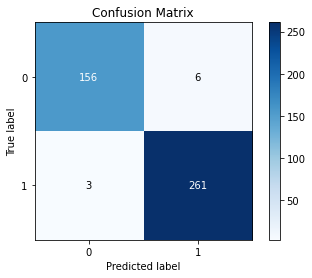

In [39]:
skplt.metrics.plot_confusion_matrix(y_train,y_pred)

In [40]:
#ROC , AUC Score
y_scores=cross_val_predict(log_reg,x_train,y_train,cv=3,method='decision_function')
y_scores #log of odds ration called as logit (-in ti + in)

array([  9.23105972,  13.67127886,   3.14799024,   3.60825216,
        11.81004351, -17.36956035, -20.53063552,   8.546831  ,
        -1.54802739,  -8.69616336, -12.43030381,  -3.44267806,
         9.323839  ,   2.10171707, -10.7151033 ,   9.10578572,
         1.36375876,   7.22649931,   3.88287227,  -7.25103968,
         6.03710619, -12.55122215,   9.0816017 ,   6.79753941,
         9.57188742,   9.31151756,   3.28725284,  -9.26081098,
         5.28068844, -16.71175617,   6.80129622,   7.60218224,
        -2.53167957, -11.62544986,   8.79597946,  -4.99875568,
         7.55862492, -23.91475892,   3.26838277,  -4.47510302,
       -17.68848437,   7.72233477,   5.45056101,  11.46551436,
         6.55432011,   3.95551761,   4.47677384, -11.79812808,
         6.63842627, -14.5349637 ,   7.11496901,  -0.5737585 ,
        -0.45456847,   4.86202362,   5.63507795,   4.39650424,
       -10.56473227,   3.03041963,   7.58718452,   3.72357691,
        10.13674253,  10.69458355,   9.74092381,   7.83

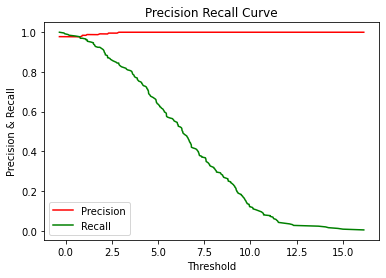

In [51]:
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score
precision,recall,threshold=precision_recall_curve(y_train,y_scores)
plt.plot(threshold,precision[:-1],c='r',label='Precision')
plt.plot(threshold,recall[:-1],c='g',label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Precision & Recall')
plt.title('Precision Recall Curve')
plt.show()

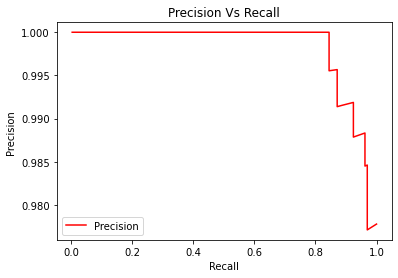

In [54]:
plt.plot(recall[: -1],precision[:-1],c='r',label='Precision')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision ')
plt.title('Precision Vs Recall')
plt.show()

# best point 0.8 where Precision and Recall high

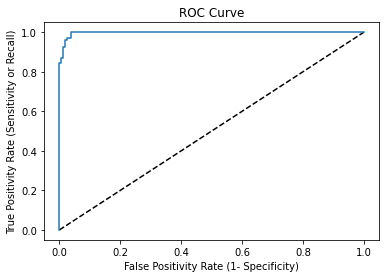

In [61]:
fpr,tpr,th=roc_curve(y_train,y_scores)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positivity Rate (1- Specificity)')
plt.ylabel('True Positivity Rate (Sensitivity or Recall)')
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()